In [166]:
import argparse
import requests
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import sklearn
from ast import literal_eval

import warnings
warnings.filterwarnings("ignore")

In [167]:
#from src.tmdb_frame import tmdb_frame
from src.tmdb_model import tmdb_model
from src.tmdb_linreg import tmdb_linreg

In [170]:
data = pd.read_csv('./03_Methodology_10-25/3A_data-output.csv', index_col=0)

In [175]:
data.head(2)

,id,release,release_date,opening_revenue,budget,origin_country,production_companies,production_countries,runtime,position_in_series,...,is_thriller,is_crime,is_documentary,is_sci_fi,is_mystery,is_music,is_romance,is_family,num_production_companies,is_series
0,59,A History of Violence,2005-09-23,364000.0,32000000,['US'],"[{'id': 12, 'logo_path': '/2ycs64eqV5rqKYHyQK0...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",96,1.0,...,1,1,0,0,0,0,0,0,3,0
1,8976,A Lot Like Love,2005-04-21,7576593.0,30000000,['US'],"[{'id': 2977, 'logo_path': None, 'name': 'Kevi...","[{'iso_3166_1': 'US', 'name': 'United States o...",107,1.0,...,0,0,0,0,0,0,1,0,4,0


                             OLS Regression Results                             
Dep. Variable:     sqrt_opening_revenue   R-squared:                       0.600
Model:                              OLS   Adj. R-squared:                  0.594
Method:                   Least Squares   F-statistic:                     91.99
Date:                  Fri, 25 Oct 2024   Prob (F-statistic):           1.45e-92
Time:                          18:11:30   Log-Likelihood:                -4295.2
No. Observations:                   499   AIC:                             8608.
Df Residuals:                       490   BIC:                             8646.
Df Model:                             8                                         
Covariance Type:              nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
cons

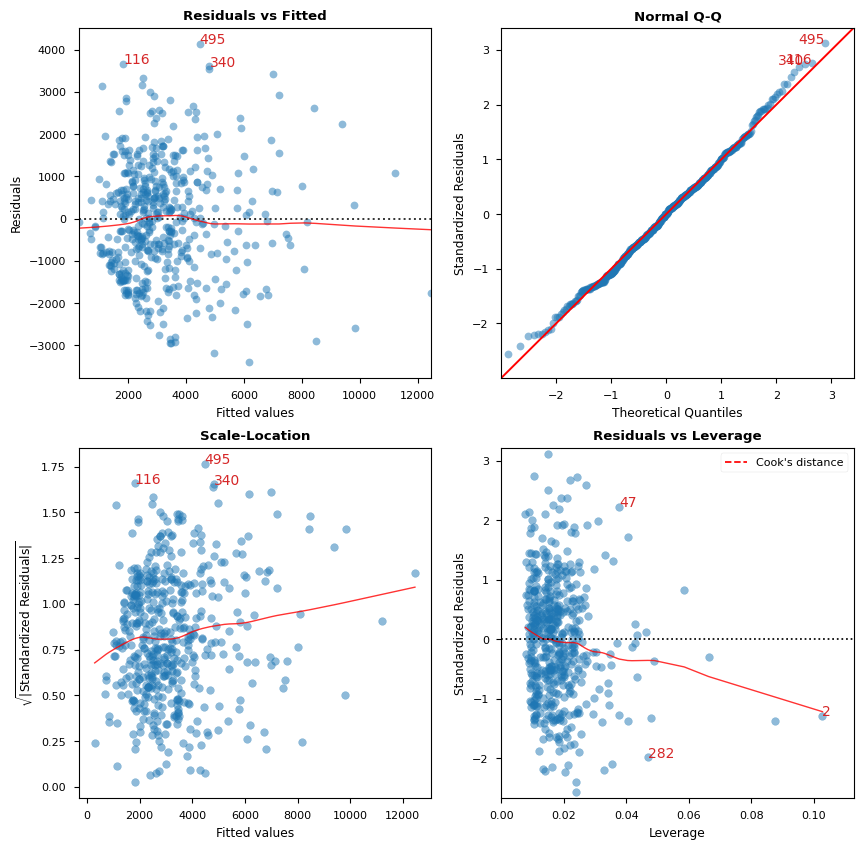

In [176]:
# Initialize TMDB model class.
mdl = tmdb_model()

cdf = data

# Generate pair plot of continuous covariates.
#sns.pairplot(cdf[['opening_revenue', 'budget', 'num_production_companies', 'runtime', 'month', 'pct_indie']])

# Generate OLS model.
Y = ['opening_revenue']
X = ['budget', 'is_series', 'num_production_companies', 'runtime', 'is_spring',
       'is_summer', 'is_fall', 'is_holiday']

cov_transform = {'opening_revenue': 'sqrt'}
# cov_transform = None

#cov_joint = [['cast_xp_sum', 'director_xp']]
cov_joint = None

_, res = mdl.get_ols_model(cdf, Y, X, cov_transform=cov_transform, cov_joint=cov_joint)

# Generate linear regression diagnostics for OLS model.
print(res.summary())

diag = tmdb_linreg(res)
vif, fig, ax = diag()